In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

%matplotlib inline

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
def linear(w,x,b):
    return w@x + b

def loss(y,yhat):
    return -y * np.log(yhat)-(1-y)*np.log(1-yhat)

In [4]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
        

(2, 200)
(1, 200)


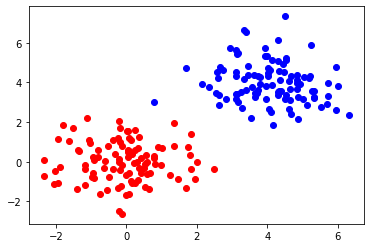

In [5]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [6]:
# set the initial learning rate

lr = 1e-4

b = 0

# introduce random initial values

w = np.random.randn(y.shape[0],X.shape[0])



In [7]:

# Gradient Decent for loop: 

loss_list = []

# set the initial learning rate

lr = 1e-4

b = 0

# introduce random initial values

w = np.random.randn(y.shape[0],X.shape[0])


for i in range(100000):

    # forward pass 
    z = linear(w,X,b)
    yhat = sigmoid(z)
    loss(y,yhat)

    loss_list.append(np.sum(loss(y,yhat)))

    # backward pass

    djdz = yhat - y

    djdw = djdz @ X.T

    ones = np.ones(200)

    ones = ones.reshape(-1,1)

    djdb = djdz @ ones  

    w -= lr*djdw # This step requires some claification. CLARIFICATION: the gradient formula is not solvable as a closed solution so we use gradient decent take the gardient at any point and move in the opposite direction.  
    b -= lr*djdb




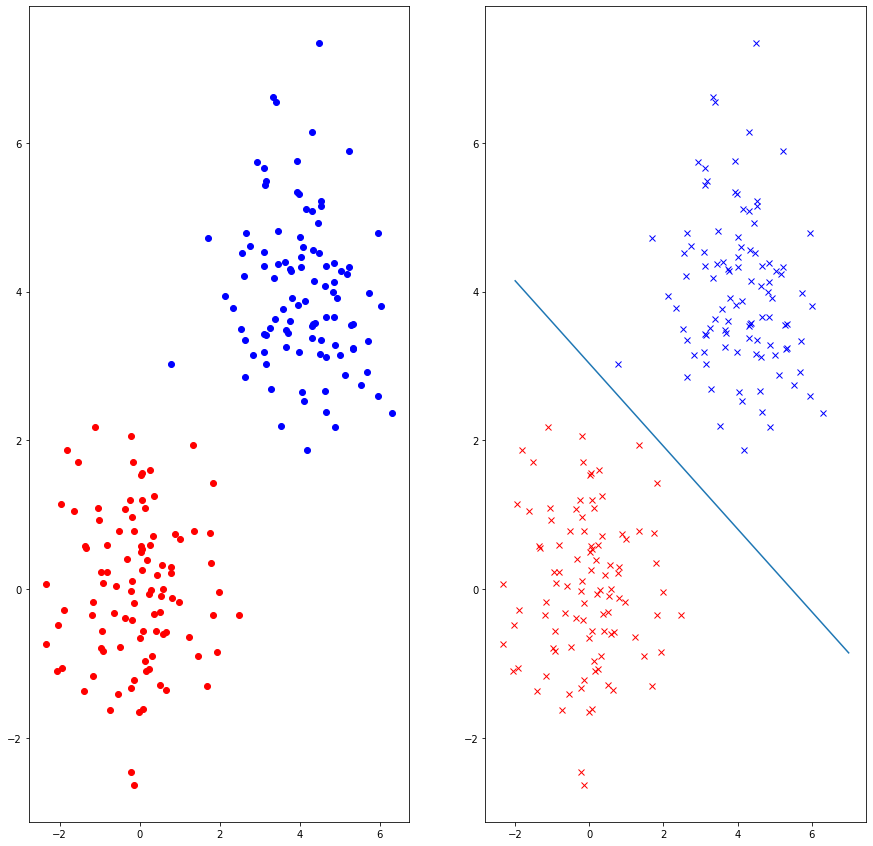

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]


plt.figure()
plt.subplot(121)
plotClass(X,y,'o')
plt.subplot(122)

plotClass(X,yhat>0.5,"x")
x1 = np.reshape(np.linspace(-2,7,2),(-1,1)) # This I need to understand better.
x2 = (- b - (w[0,0]*x1))/w[0,1]
plt.plot(x1,x2)
